
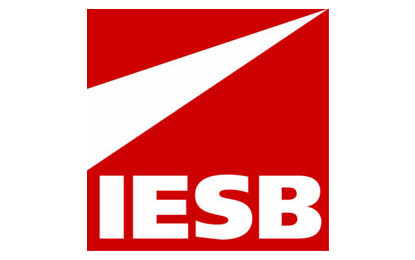
**Instituto de Educação Superior de Brasília**

**Pós Graduação em Ciência de Dados**

**Data Mining e Machine Learning II**

**Kamilla Matos – 1931133012**

# 1- INTRODUÇÃO#
Este trabalho tem como objetivo analisar o dataset HMEQ_Data que contém dados sobre tomadas de empréstimos. 
Para isso será utilizado modelo estatistico que possibilite, a partir da análise das variáveis existentes e de como elas influenciam a variavel resultado, "BAD". 


1. 1. Carregando os dados:

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv('/kaggle/input/hmeq-data/hmeq.csv')

1. 2. Carregando as bibliotecas:

In [ ]:
#Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

1. 3. Verificando carregamento dos dados:

In [ ]:
#Verificando o carregamento da base
df.shape

1. 4.  Dicionário de dados

In [ ]:
#Variáveis e dicionário de dados
VAR = [["BAD", "1 representa mal pagador e 0 para bom pagador"],
             ["LOAN", "Montante da solicitação de empréstimo"],
             ["MORTDUE", "Valor devido da hipoteca existente"],
             ["VALUE", "Valor da propriedade atual"],
             ["REASON", "Razão da Consolidação da dívida/Melhoramento da casa"],
             ["JOB", "Seis categorias profissionais"],
             ["YOJ", "Anos no emprego atual"],
             ["DEROG", "Número de principais relatórios depreciativos"],
             ["DELINQ", "Número de linhas de crédito inadimplentes"],
             ["CLAGE", "Idade da linha comercial mais antiga em meses"],
             ["NINQ", "Número de linhas de crédito recentes"],
             ["CLNO", "Número de linhas de crédito"],
             ["DEBTINC", "Razão da dívida / rendimento"]]
            
DF_VAR = pd.DataFrame(VAR, columns=["Variavel", "Descrição"])
DF_VAR


# 2- TRATAMENTO DOS DADOS

2. 1. Conhecendo os dados

In [ ]:
# Verificando os tipos e tamanhos dos dados
df.info()

In [ ]:
# Conferindo amostra dos dados
df.sample(5).T

2. 2. Imputando valores para nan na coluna JOBS

In [ ]:
df.update(df['JOB'].fillna('Other'))
df.head(20).T

2. 3. Descartando linhas Nan na coluna LOAN

In [ ]:
df = df.dropna(subset=['LOAN'])
df.head(20).T

2. 4. Novo tamanho do dataset

In [ ]:
df.shape

2. 5. Preenchendo o restante dos valores Nan com 0

In [ ]:
df.fillna(0, inplace=True)

# 3- ANÁLISE EXPLORATÓRIA

3. 1. Fazendo análises estatísticas básicas

In [ ]:
df.describe()

3. 2. Os 5 maiores valores de pedidos de empréstimos

In [ ]:
df.nlargest(5, 'LOAN')[['REASON', 'LOAN']].style.hide_index()

3. 3. Os 5 maiores valores de Hipotecas

In [ ]:
df.nlargest(5, 'MORTDUE')[['MORTDUE']].style.hide_index()

3. 4. Gráfico demonstrando a distribuição de valores de emprétimos pela sua quantidade[](http://)

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
fig = df.LOAN.hist(bins=25)
fig.set_title('Distribuição de Valores Empréstimos (LOAN)')
fig.set_xlabel('Valores de empréstimos')
fig.set_ylabel('Quantidade de empréstimos')

3. 5. Gráfico demonstrando a distribuição dos valores de hipoteca pela sua quantidade 

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
fig = df.MORTDUE.hist(bins=25)
fig.set_title('Distribuição de Valores Hipotacas (MORTDUE)')
fig.set_xlabel('Valores de hipotecas')
fig.set_ylabel('Quantidade de hipotecas')

3. 6. Gráfico demosntrando os valores tomados em empréstimo por Profissões

In [ ]:
jobs = df['JOB'].dropna().unique()
plt.figure(figsize=(18,19))
c=1
for i in jobs:
    plt.subplot(7,1,c)
    plt.title(i)
    df[df['JOB'] == i]['VALUE'].hist(bins=20)
    c+=1
plt.tight_layout() 

3. 7. Gráfico de calor demonstrando a correlação entre variáveis

In [ ]:
f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linecolor='blue', ax=ax, lw=.7)

# 4- PREVISÕES

In [ ]:
# Dividir a base em treino e teste
train, test = train_test_split(df, test_size=0.20, random_state=42)

# verificando tamanhos
train.shape, test.shape

In [ ]:
# Lista das colunas nao usadas
removed_cols = ['BAD','REASON','JOB']

# Criar a lista das colunas de entrada
feats = [c for c in train.columns if c not in removed_cols]

4. 1. Usando XGB e Cross Validation

In [ ]:
# XGBoost
# Instanciar o modelo
xgb = XGBClassifier(n_estimators=200, n_jobs=-1, random_state=42, learning_rate=0.05)

In [ ]:
scores = cross_val_score(xgb, train[feats], train['BAD'], n_jobs=-1, cv=5)
scores, scores.mean()

In [ ]:
xgb.fit(train[feats], train['BAD'])

In [ ]:
# Fazendo predições
preds = xgb.predict(test[feats])
preds

In [ ]:
preds

In [ ]:
# Verificando o real
test['BAD'].head(3)

In [ ]:
# Medir o desempenho do modelo XGB
accuracy_score(test['BAD'], preds)

4. 3. Usando Random Forest para treinamento e predição

In [ ]:
# Instanciar o modelo
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
#Treinando o modelo RandomForest
rf.fit(train[feats], train['BAD'])

In [ ]:
# Fazendo previsões em cima dos dados de teste da árvore
predstree = rf.predict(test[feats])

In [ ]:
# Verificando as previsoes
predstree

In [ ]:
# Aplicando a metrica
mean_squared_error(test['BAD'], predstree)**(1/2)

4. 4. Preparação para feature engineering

In [ ]:
# Conhecendo os valores da variável JOB
df.JOB.unique()

In [ ]:
# Conhecendo os valores da variável REASON
df.REASON.unique()

4. 5. Feature engineering

In [ ]:
# Criando dummys para as variáveis do tipo "objeto" (JOB e REASON)
df = pd.get_dummies(df, columns=['JOB','REASON'], dtype=int)

In [ ]:
#Novo tamanho do dataset
df.shape

In [ ]:
# Dividir a base em treino e validação
train, test = train_test_split(df, random_state=42)

In [ ]:
# verificando tamanhos
train.shape, test.shape

In [ ]:
# Lista das colunas nao usadas
removed_cols = ['BAD']

# Criar a lista das colunas de entrada
feats = [c for c in train.columns if c not in removed_cols]

4. 6. Usando XGB e Cross Validation

In [ ]:
# XGBoost
# Instanciar o modelo
xgb = XGBClassifier(n_estimators=200, n_jobs=-1, random_state=42, learning_rate=0.05)
xgb.fit(train[feats], train['BAD'])


In [ ]:
scores = cross_val_score(xgb, train[feats], train['BAD'], n_jobs=-1, cv=5)
scores, scores.mean()

In [ ]:
# Fazendo predições
preds = xgb.predict(test[feats])


In [ ]:
preds

In [ ]:
# Verificando o real
test['BAD'].head(3)

In [ ]:
# Medir o desempenho do modelo XGB
accuracy_score(test['BAD'], preds)

4. 8. Usando Random Forest para treinamento e predição

In [ ]:
# Instanciar o modelo
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
# Treinando o modelo
rf.fit(train[feats], train['BAD'])

In [ ]:
# Fazendo previsões em cima dos dados de validação
predstree = rf.predict(test[feats])

In [ ]:
# Verificando as previsoes
predstree


In [ ]:
# Verificando o real
test['BAD'].head(3)

In [ ]:
# Aplicando a metrica
mean_squared_error(test['BAD'], preds)**(1/2)

# 5- Conclusões: